In [1]:
# Step 1: Upload the dataset
from google.colab import files
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
# Step 3: Load dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Step 4: Drop 'CustomerID' and encode 'Gender'
df = df.drop('CustomerID', axis=1)

# Encode Gender: Female = 0, Male = 1
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [5]:
# Step 5: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


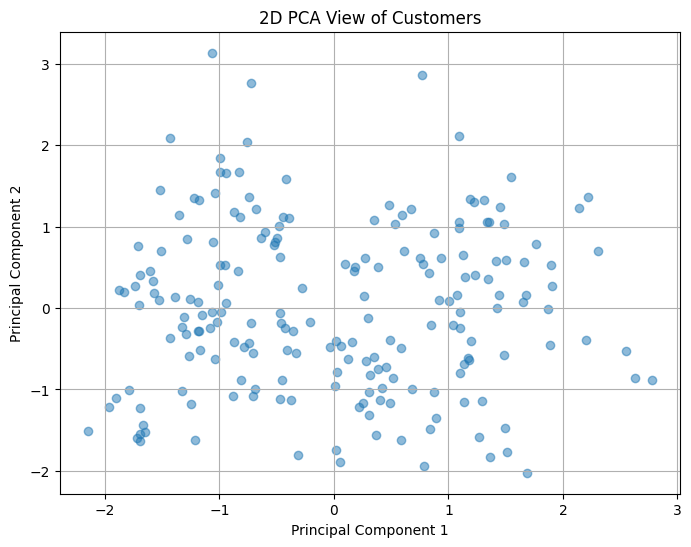

In [6]:
# Step 6: Optional - PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("2D PCA View of Customers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


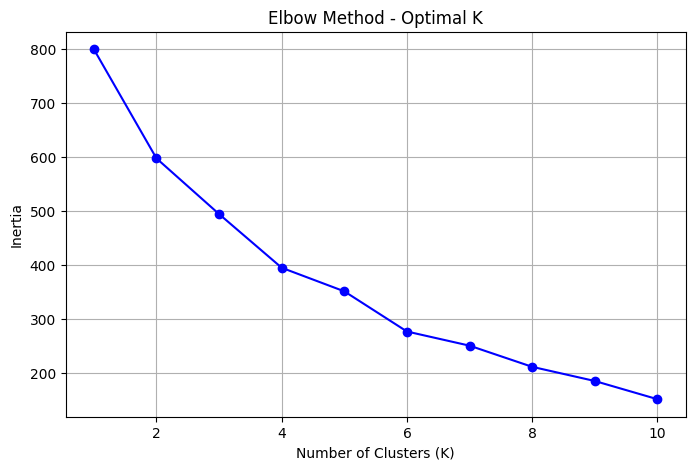

In [7]:
# Step 7: Elbow Method to find optimal K
inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [8]:
# Step 8: Fit KMeans with optimal K (say K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters


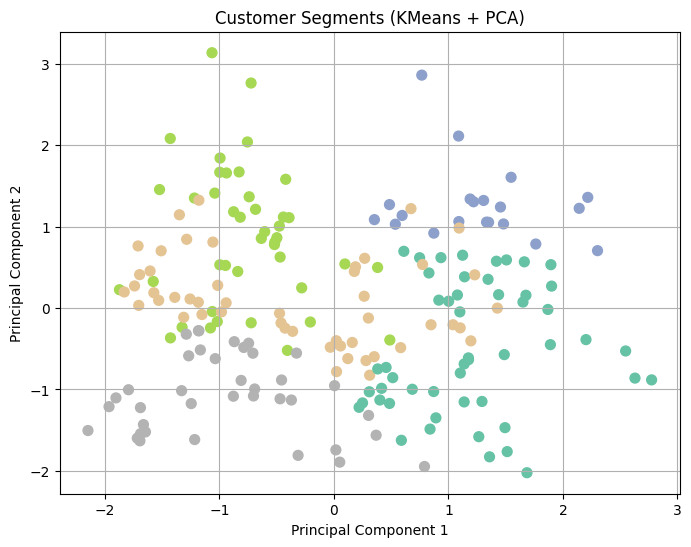

In [9]:
# Step 9: Visualize clusters using 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', s=50)
plt.title("Customer Segments (KMeans + PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


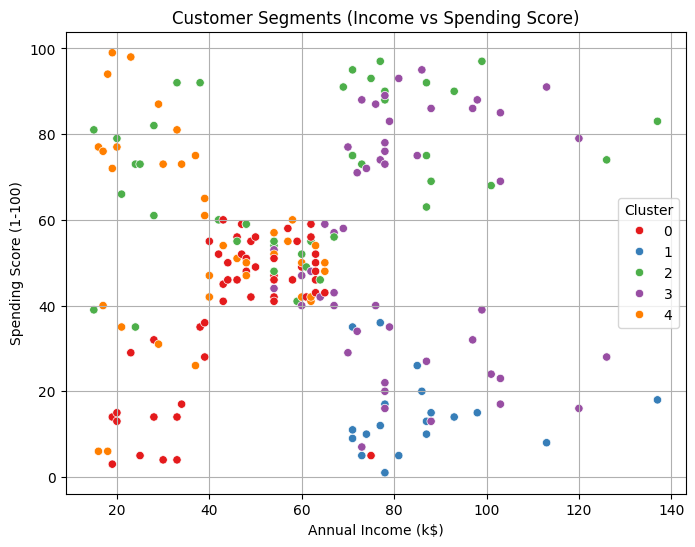

In [10]:
# Step 10: Visualize clusters using original features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments (Income vs Spending Score)')
plt.grid(True)
plt.show()


In [11]:
# Step 11: Evaluate using Silhouette Score
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", round(score, 3))


Silhouette Score: 0.272
